<a href="https://colab.research.google.com/github/Vladzimir-40/Proj_1/blob/main/my_file3/dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install kagglehub

from google.colab import files
files.upload() # Загрузите файл kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vladimir401011","key":"e6b9eec8a00a0a7c2c3e5fcbd033ab06"}'}

In [ ]:
import pandas as pd
import kagglehub
import os

class Data_loading:
    @staticmethod
    def load_from_kaggle(dataset_path, filename):
        """
        Загружает dataset из Kaggle используя kagglehub

        Args:
            dataset_path (str): путь к dataset на Kaggle
            filename (str): название файла для загрузки

        Returns:
            pd.DataFrame: загруженный датафрейм
        """
        download_path = kagglehub.dataset_download(dataset_path)
        file_path = os.path.join(download_path, filename)
        return pd.read_csv(file_path)


import kagglehub

# Download latest version
path = kagglehub.dataset_download("zadafiyabhrami/global-crocodile-species-dataset")

print("Path to dataset files:", path)
print("\nЗагруженные файлы:")
for file in os.listdir(path):
    print(f"📁 {file}")


100%|██████████| 56.1k/56.1k [00:00<00:00, 32.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zadafiyabhrami/global-crocodile-species-dataset/versions/1

Загруженные файлы:
📁 crocodile_dataset.csv


Плучаем датафрейм через статический метод, в который передем "путь" и "имя csv-файла"

In [27]:
df = Data_loading.load_from_kaggle("zadafiyabhrami/global-crocodile-species-dataset", "crocodile_dataset.csv")

Using Colab cache for faster access to the 'global-crocodile-species-dataset' dataset.


In [28]:
# Просматриваем первые несколько строк датасета
print(df.head())

# Получаем общую информацию о датасете
print(df.info())

   Observation ID                         Common Name         Scientific Name  \
0               1                 Morelet's Crocodile    Crocodylus moreletii   
1               2                  American Crocodile       Crocodylus acutus   
2               3                   Orinoco Crocodile  Crocodylus intermedius   
3               4                 Morelet's Crocodile    Crocodylus moreletii   
4               5  Mugger Crocodile (Marsh Crocodile)    Crocodylus palustris   

         Family       Genus  Observed Length (m)  Observed Weight (kg)  \
0  Crocodylidae  Crocodylus                 1.90                  62.0   
1  Crocodylidae  Crocodylus                 4.09                 334.5   
2  Crocodylidae  Crocodylus                 1.08                 118.2   
3  Crocodylidae  Crocodylus                 2.42                  90.4   
4  Crocodylidae  Crocodylus                 3.75                 269.4   

  Age Class      Sex Date of Observation Country/Region      Habitat

Создание базы данных

In [29]:
import sqlite3

# Подключение к SQLite базе данных (или создание, если не существует)
conn = sqlite3.connect('crocodiles.db')

Делаем таблицу

In [30]:
# Создание курсора
cursor = conn.cursor()

# Создание таблицы "crocodile_inhabitants" (содержит всю информацию об местах обитания крокодилов)
cursor.execute('''CREATE TABLE IF NOT EXISTS crocodile_inhabitants (
    crocodile_id INTEGER PRIMARY KEY,
    common_name VARCHAR(30) NOT NULL,
    scient_name VARCHAR(30) NOT NULL,
    observ_length_m NUMERIC,
    observ_weight_kg NUMERIC,
    age_class VARCHAR(20),
    sex VARCHAR(10),
    date_of_obs VARCHAR(10),
    country_region VARCHAR(30),
    habitat_type VARCHAR(30)
)''')

conn.commit()

Делаем вставку в БД crocodiles.db, в таблицу данных crocodile_inhabitants из df

In [31]:
cursor = conn.cursor()

data_f = df[['Observation ID', 'Common Name', 'Scientific Name', 'Observed Length (m)',
             'Observed Weight (kg)', 'Age Class', 'Sex', 'Date of Observation',
             'Country/Region', 'Habitat Type']].values.tolist()

cursor.executemany('''INSERT INTO crocodile_inhabitants
                   (crocodile_id, common_name, scient_name, observ_length_m,
                    observ_weight_kg, age_class, sex, date_of_obs,
                    country_region, habitat_type)
                   VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''', data_f)

conn.commit()

OperationalError: database is locked

In [32]:
#Проверка вставленных строк

cursor = conn.cursor()

cursor.execute("SELECT * FROM crocodile_inhabitants")
croco = cursor.fetchmany(15) #выбираем первые 15
for cr in croco:
    print(cr)

(1, "Morelet's Crocodile", 'Crocodylus moreletii', 1.9, 62, 'Adult', 'Male', '31-03-2018', 'Belize', 'Swamps')
(2, 'American Crocodile', 'Crocodylus acutus', 4.09, 334.5, 'Adult', 'Male', '28-01-2015', 'Venezuela', 'Mangroves')
(3, 'Orinoco Crocodile', 'Crocodylus intermedius', 1.08, 118.2, 'Juvenile', 'Unknown', '07-12-2010', 'Venezuela', 'Flooded Savannas')
(4, "Morelet's Crocodile", 'Crocodylus moreletii', 2.42, 90.4, 'Adult', 'Male', '01-11-2019', 'Mexico', 'Rivers')
(5, 'Mugger Crocodile (Marsh Crocodile)', 'Crocodylus palustris', 3.75, 269.4, 'Adult', 'Unknown', '15-07-2019', 'India', 'Rivers')
(6, 'Mugger Crocodile (Marsh Crocodile)', 'Crocodylus palustris', 2.64, 137.4, 'Adult', 'Male', '08-06-2023', 'India', 'Reservoirs')
(7, 'Siamese Crocodile', 'Crocodylus siamensis', 2.85, 157.7, 'Subadult', 'Male', '10-12-2010', 'Thailand', 'Slow Rivers')
(8, 'Congo Dwarf Crocodile', 'Osteolaemus osborni', 0.35, 4.7, 'Juvenile', 'Unknown', '03-08-2008', 'Central African Republic', 'Forest 

Запросы по ДЗ

('Orinoco Crocodile', 401.6)
('American Crocodile', 229.19)
('Borneo Crocodile (disputed)', 147.96)
("Hall's New Guinea Crocodile", 118.15)
('New Guinea Crocodile', 102.32)


<Figure size 1000x600 with 0 Axes>

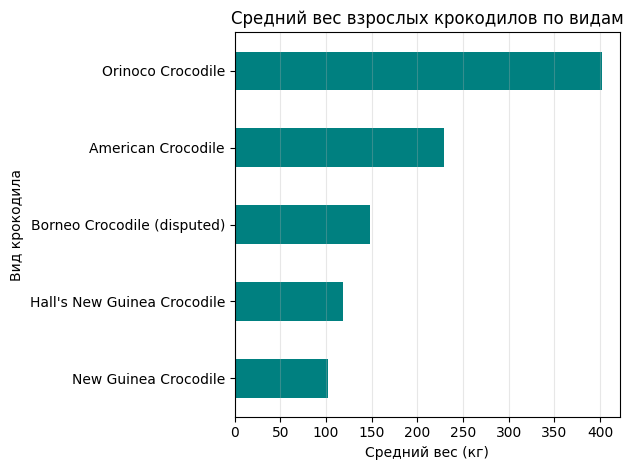

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Задача_1: Средний вес взрослых крокодилов common_name = New Guinea Crocodile,
# Borneo Crocodile (disputed), American Crocodile, Orinoco Crocodile. Сортировка
# от самых тяжелых к легким

# SQL Запрос
sql_txt = """SELECT c.common_name,
                    round(AVG(c.observ_weight_kg),2) avg_croko_kg
             FROM   crocodile_inhabitants c
             WHERE  (c.common_name like '%New Guinea Crocodile%' or
                     c.common_name like '%Borneo Crocodile (disputed)%' or
                     c.common_name like '%American Crocodile%' or
                     c.common_name like '%Orinoco Crocodile%')
                    and c.age_class = 'Adult' -- взослые крокодилы
             GROUP BY c.common_name
             ORDER BY 2 DESC"""

cursor_2 = conn.cursor()
cursor_2.execute(sql_txt)
croco = cursor_2.fetchall()
for cr_2 in croco:
    print(cr_2)

# Создаем DataFrame из данных о крокодилах
df_croco = pd.DataFrame(croco, columns=['common_name', 'avg_weight_kg'])

# Сортируем по весу для лучшего отображения
df_croco = df_croco.sort_values('avg_weight_kg', ascending=True)

# Строим горизонтальный барплот (аналог гистограммы для категориальных данных)
plt.figure(figsize=(10, 6))
df_croco.plot.barh(x='common_name', y='avg_weight_kg', legend=False, color='teal')
plt.title('Средний вес взрослых крокодилов по видам')
plt.xlabel('Средний вес (кг)')
plt.ylabel('Вид крокодила')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

('Mugger Crocodile (Marsh Crocodile)', 7)
('Saltwater Crocodile', 10)


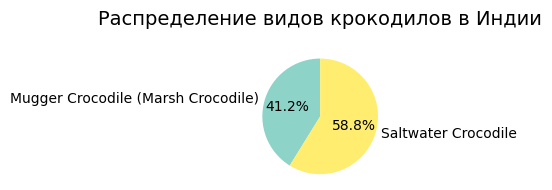

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Задача_2: Количество наблюдаемых крокодилов в Индии в разрезе видов крокодилов

# SQL Запрос
sql_txt = """SELECT c.common_name,
                    COUNT(*) kol_obs_croco
             FROM   crocodile_inhabitants c
             WHERE  c.country_region = 'India'
             GROUP BY c.common_name"""

cursor_3 = conn.cursor()
cursor_3.execute(sql_txt)
croco = cursor_3.fetchall()
for cr_3 in croco:
    print(cr_3)

# Создаем DataFrame из данных о крокодилах в Индии
df_croco_india = pd.DataFrame(croco, columns=['common_name', 'count'])

# Строим круговую диаграмму
plt.figure(figsize=(4, 2))
colors = plt.cm.Set3(np.linspace(0, 1, len(df_croco_india)))

# Круговая диаграмма с процентами и подписями
plt.pie(df_croco_india['count'],
        labels=df_croco_india['common_name'],
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 10})

plt.title('Распределение видов крокодилов в Индии', fontsize=14, pad=20)
plt.axis('equal')  # Чтобы диаграмма была круглой
plt.tight_layout()
plt.show()